# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

* You have been given datasets that describe the houses in california.Now based on given feature you have Predict house prices

# Creating a DataFrame

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data)

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


* Adding Columns

In [ ]:
california = fetch_california_housing()
df = pd.DataFrame(california.data)

In [ ]:
df.columns = california.feature_names

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
column_names = df.columns

In [ ]:
column_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# Columns Information

* This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

# Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

# Adding the target column into DataFrame

In [ ]:
df = df.drop(['PRICE','HouseValue'], axis=1)

In [ ]:
df['MedHouseValue'] = california.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseValue,float64


In [ ]:
df.nunique()

,0
MedInc,12928
HouseAge,52
AveRooms,19392
AveBedrms,14233
Population,3888
AveOccup,18841
Latitude,862
Longitude,844
MedHouseValue,3842


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

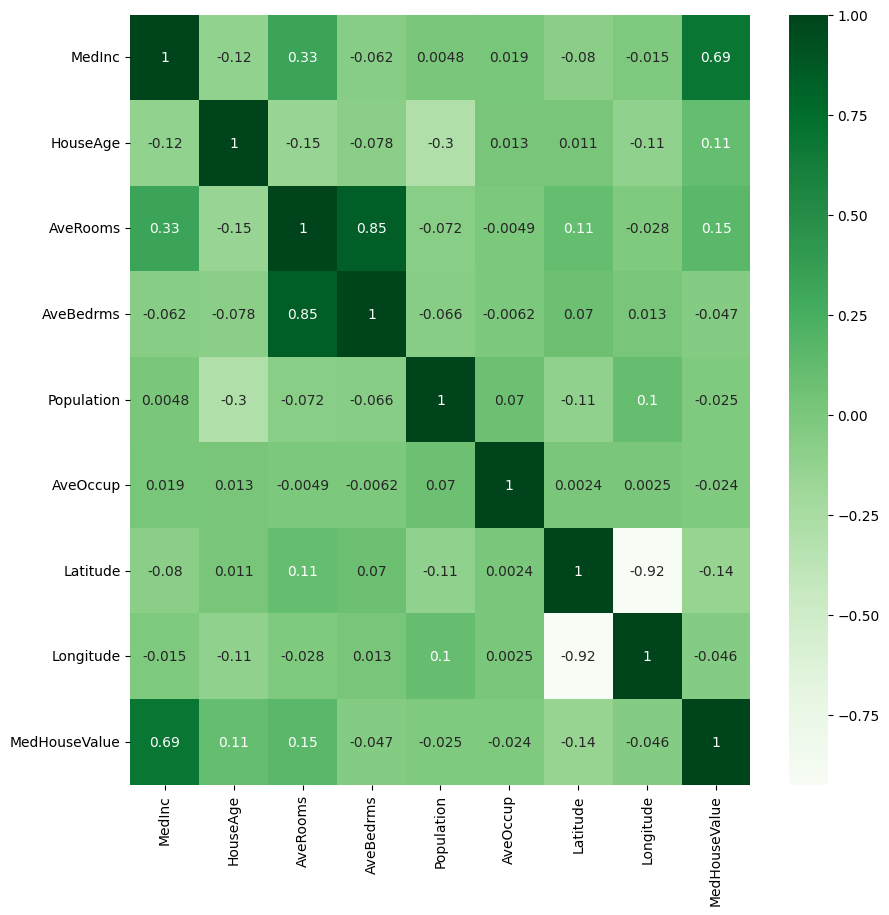

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, cmap='Greens')

In [ ]:
sns.pairplot(df, size=5)

Output hidden; open in https://colab.research.google.com to view.

# plot Boxplot means outlier datapoints can come.

<Axes: >

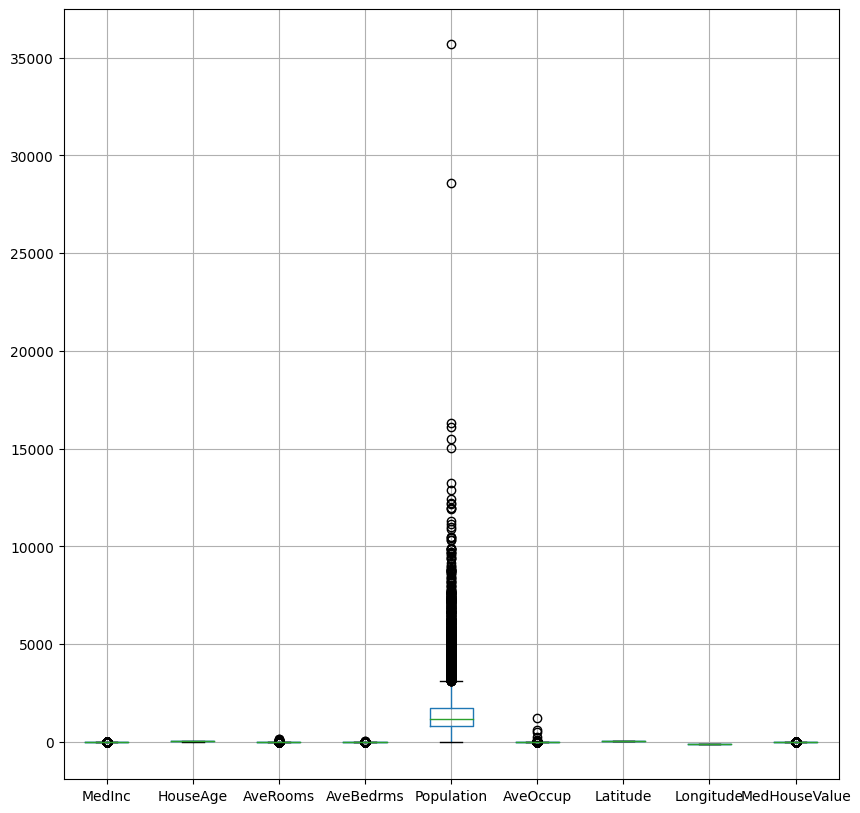

In [ ]:
plt.figure(figsize=(10,10,))
df.boxplot()

# Minimum Price

In [ ]:
df.MedHouseValue.min()

0.14999

In [ ]:
df.MedHouseValue.max()

5.00001

In [ ]:
df.MedHouseValue.std()

1.1539561587441387

# Machine Learning - Linear Regression

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
x = np.array(df.drop('MedHouseValue', axis=1))
y = np.array(df.MedHouseValue)

# x = california.data
# y = california.target

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# Splitting the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=50)

In [ ]:
len(x_train)

14448

In [ ]:
len(y_train)

14448

In [ ]:
len(x_test)

6192

In [ ]:
len(y_test)

6192

# Choosing the model

In [ ]:
model = LinearRegression()

# Fitting / Train the model

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

for i,name in enumerate(california.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')


    MedInc: 0.42881913610510247
  HouseAge: 0.009024667753455902
  AveRooms: -0.09539455234479902
 AveBedrms: 0.5792702603154545
Population: -7.144907295030282e-06
  AveOccup: -0.0038275878666895473
  Latitude: -0.4250563663120248
 Longitude: -0.43663474964694177


In [ ]:
# Intercept value
model.intercept_

-37.0081403115457

In [ ]:
# Coefficient value
model.coef_

array([ 4.28819136e-01,  9.02466775e-03, -9.53945523e-02,  5.79270260e-01,
       -7.14490730e-06, -3.82758787e-03, -4.25056366e-01, -4.36634750e-01])

# Prediction

In [ ]:
y_test

array([1.963, 2.75 , 1.275, ..., 1.   , 1.633, 1.381])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1.72416778, 2.88706346, 1.88708396, ..., 1.08271069, 1.49409677,
       1.75064235])

# Testing the model Performnce

In [ ]:
model.score(x_test, y_test)

0.6047333591854458

In [ ]:
# R squared
r2_score(y_test, y_pred)

0.6047333591854458

In [ ]:
# Adjusted R squared

In [ ]:
# MSE
mean_squared_error(y_test, y_pred)

0.5251893796369382

In [ ]:
# MAE
mean_absolute_error(y_test, y_pred)

0.5298124731179688

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.724699509891471

Text(0.5, 1.0, 'Actual MedHouseValue v/s Prediction MedHouseValue')

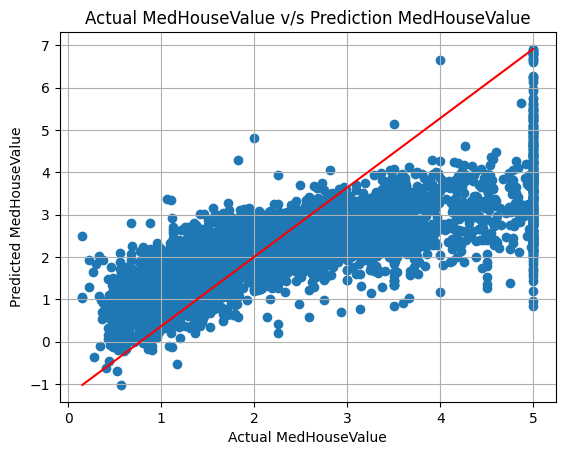

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MedHouseValue")
plt.ylabel("Predicted MedHouseValue")
plt.grid()
plt.plot([min(y_test), max(y_test)],[min(y_pred), max(y_pred)], color='red')
plt.title('Actual MedHouseValue v/s Prediction MedHouseValue')

In [ ]:
#Testing the model
predicted = linear_regression.predict(x_test)
expected = y_test

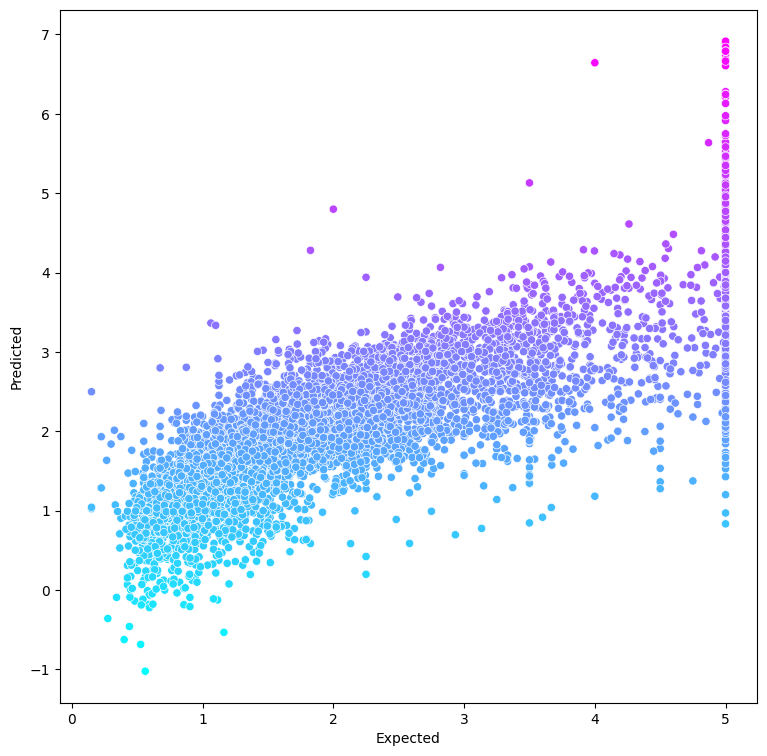

In [ ]:
#Visualizing the Expected vs. Predicted Prices
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', legend=False)

# Klib Library

In [ ]:
 ! pip install klib

In [ ]:
import klib
import pandas as pd
from sklearn.datasets import load_diabetes

In [ ]:
df = pd.DataFrame(load_diabetes().data)

In [ ]:
df.columns = load_diabetes().feature_names

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# klib.describe - functions for visualizing datasets
# klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
#- klib.corr_mat(df) # returns a color-encoded correlation matrix
#- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
#- klib.corr_interactive_plot(df, split="neg").show() # returns an interactive correlation plot using plotly
#- klib.dist_plot(df) # returns a distribution plot for every numeric feature
#- klib.missingval_plot(df) # returns a figure containing information about missing values


No columns with categorical data were detected.


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


GridSpec(6, 5)

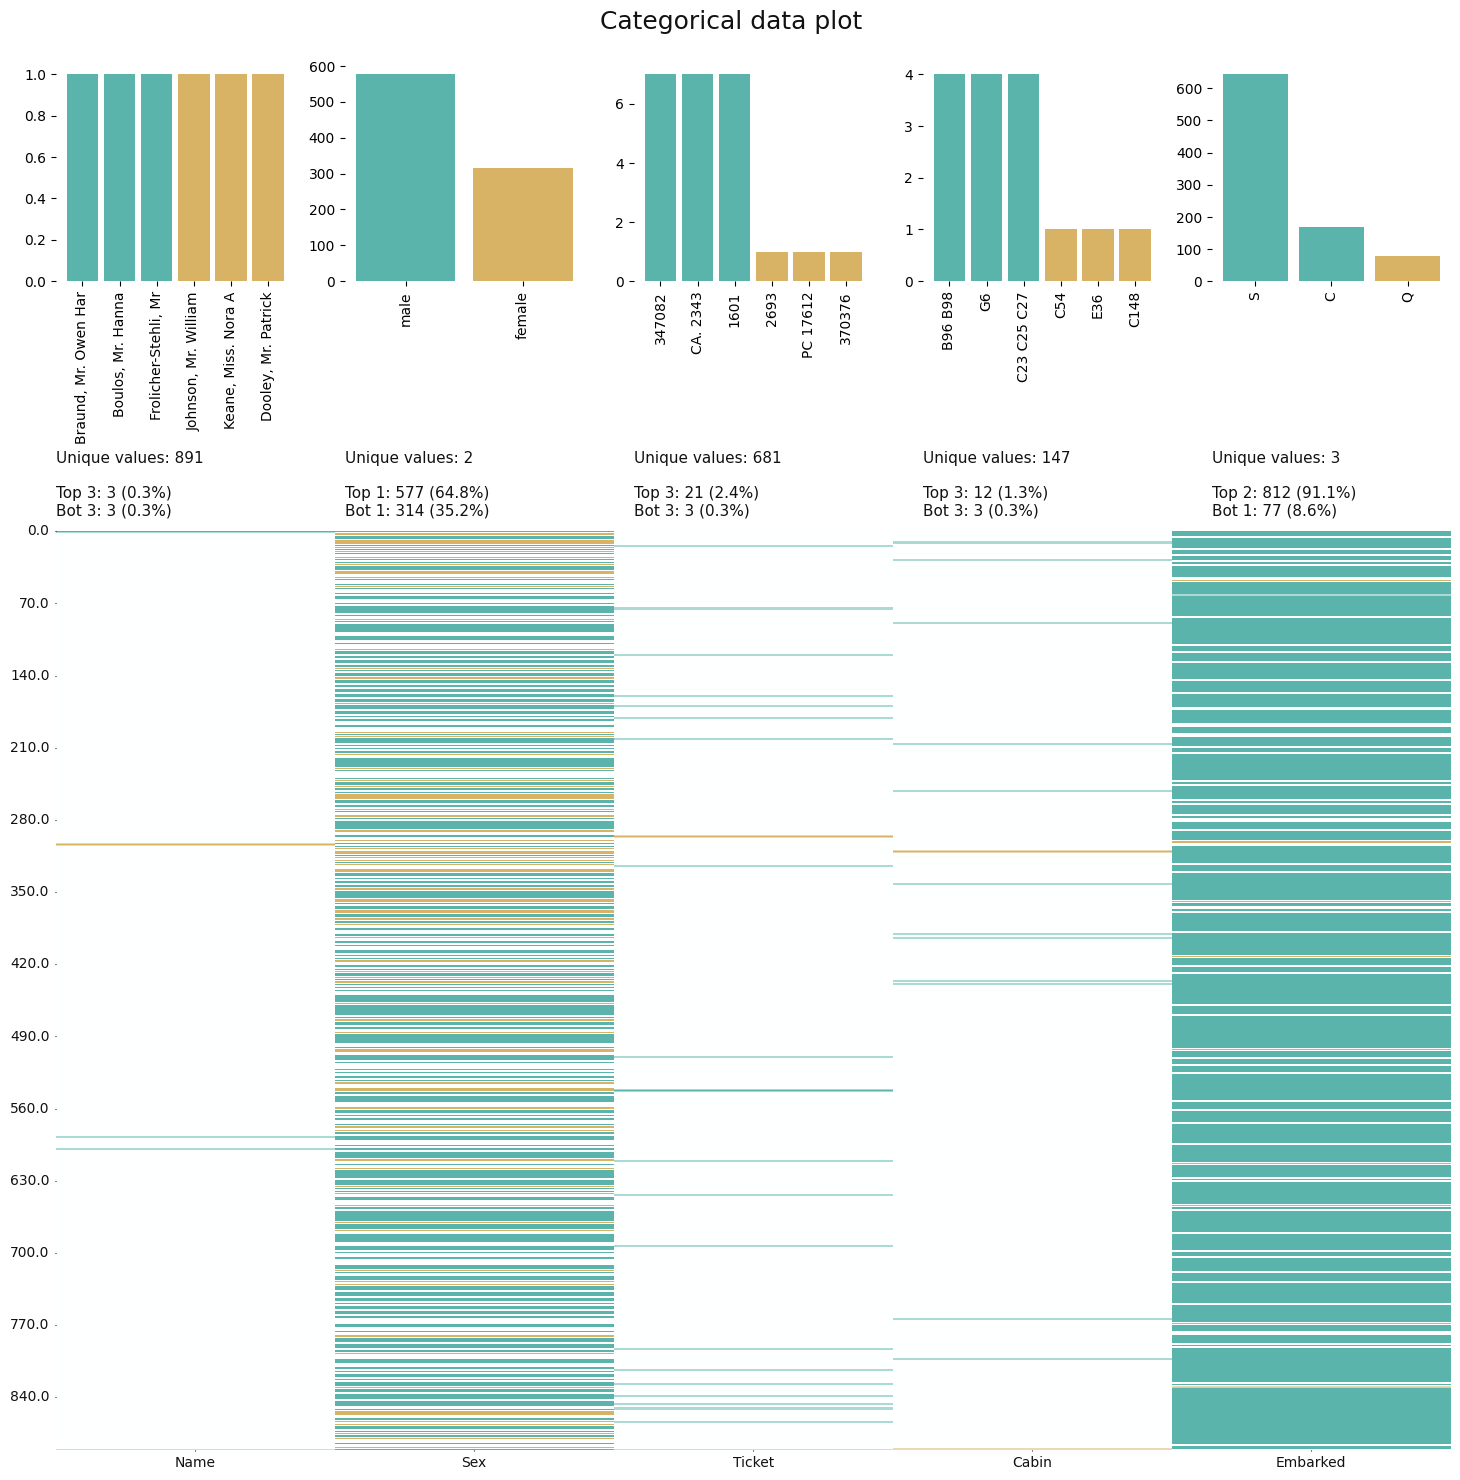

In [ ]:
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

In [ ]:
klib.corr_mat(df) # returns a color-encoded correlation matrix

/usr/local/lib/python3.10/dist-packages/klib/describe.py:275: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

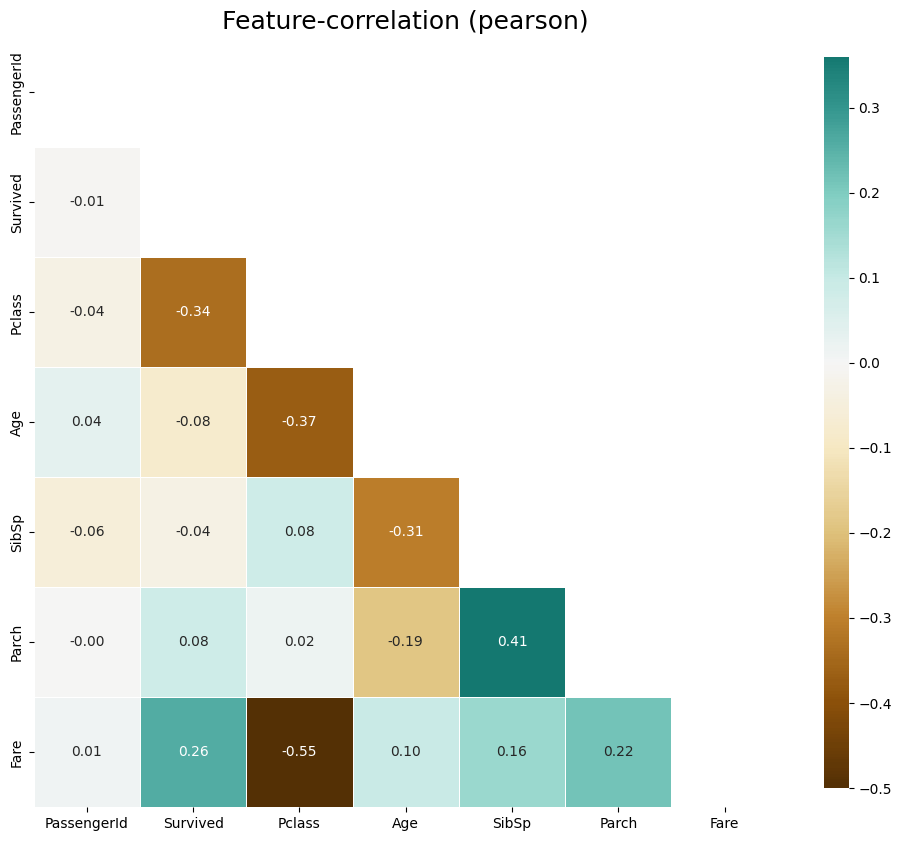

In [ ]:
# correlation
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

<Axes: xlabel='Fare', ylabel='Density'>

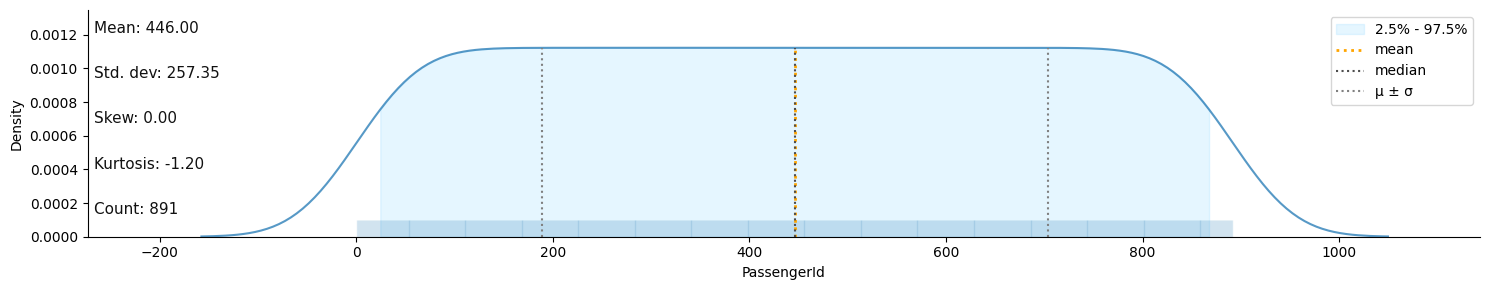

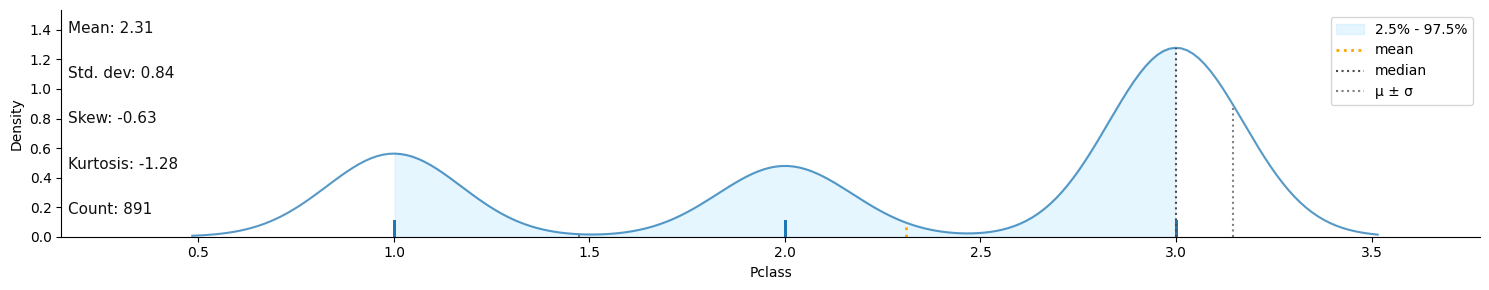

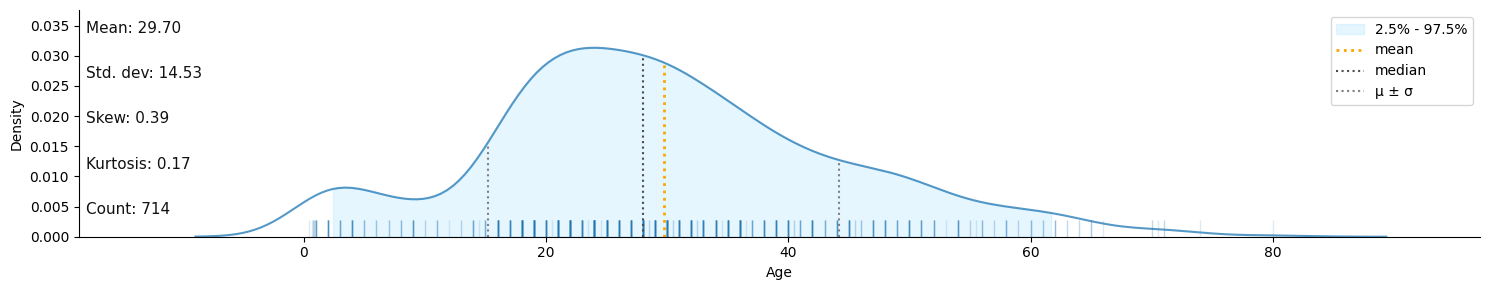

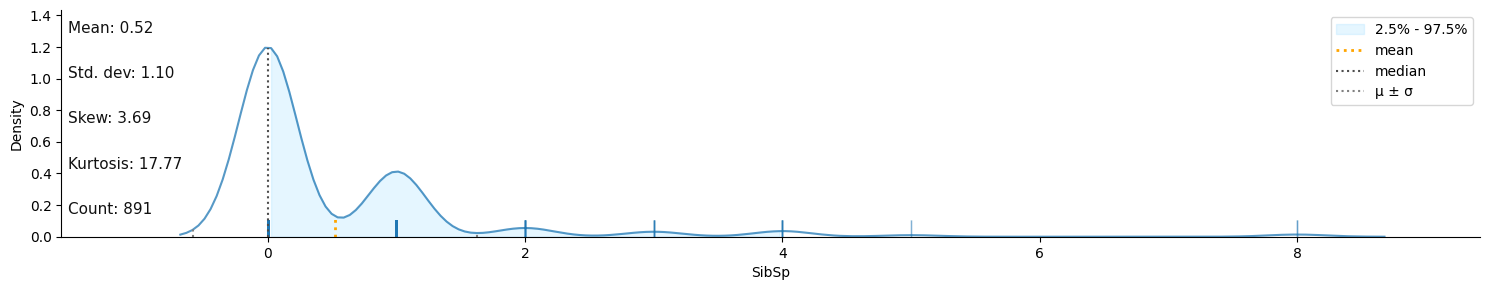

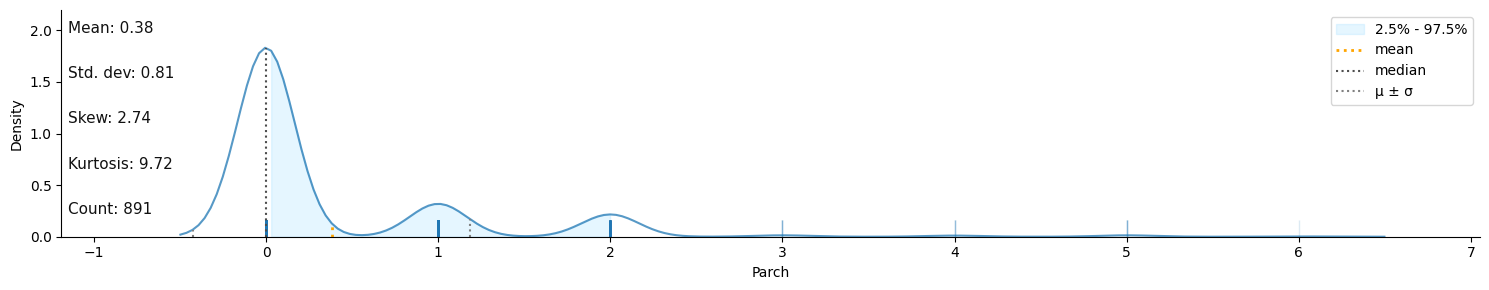

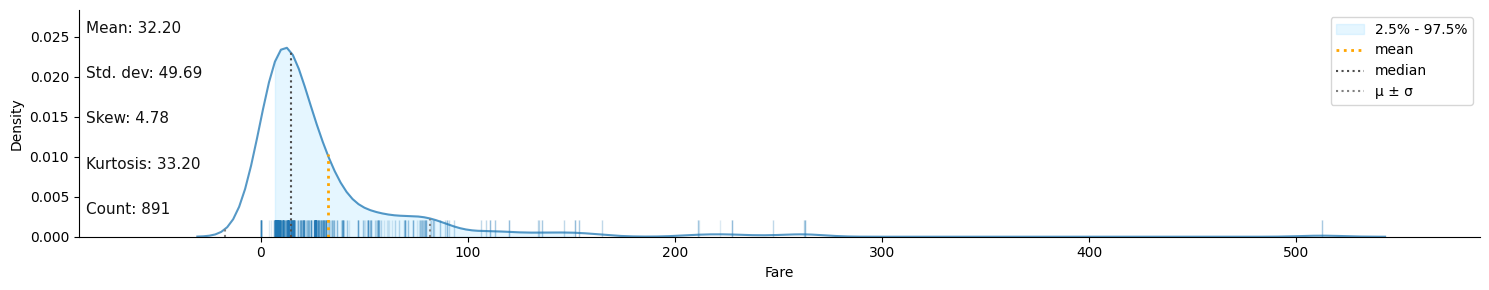

In [ ]:
# Probability Distribution
klib.dist_plot(df) # returns a distribution plot for every numeric feature

GridSpec(6, 6)

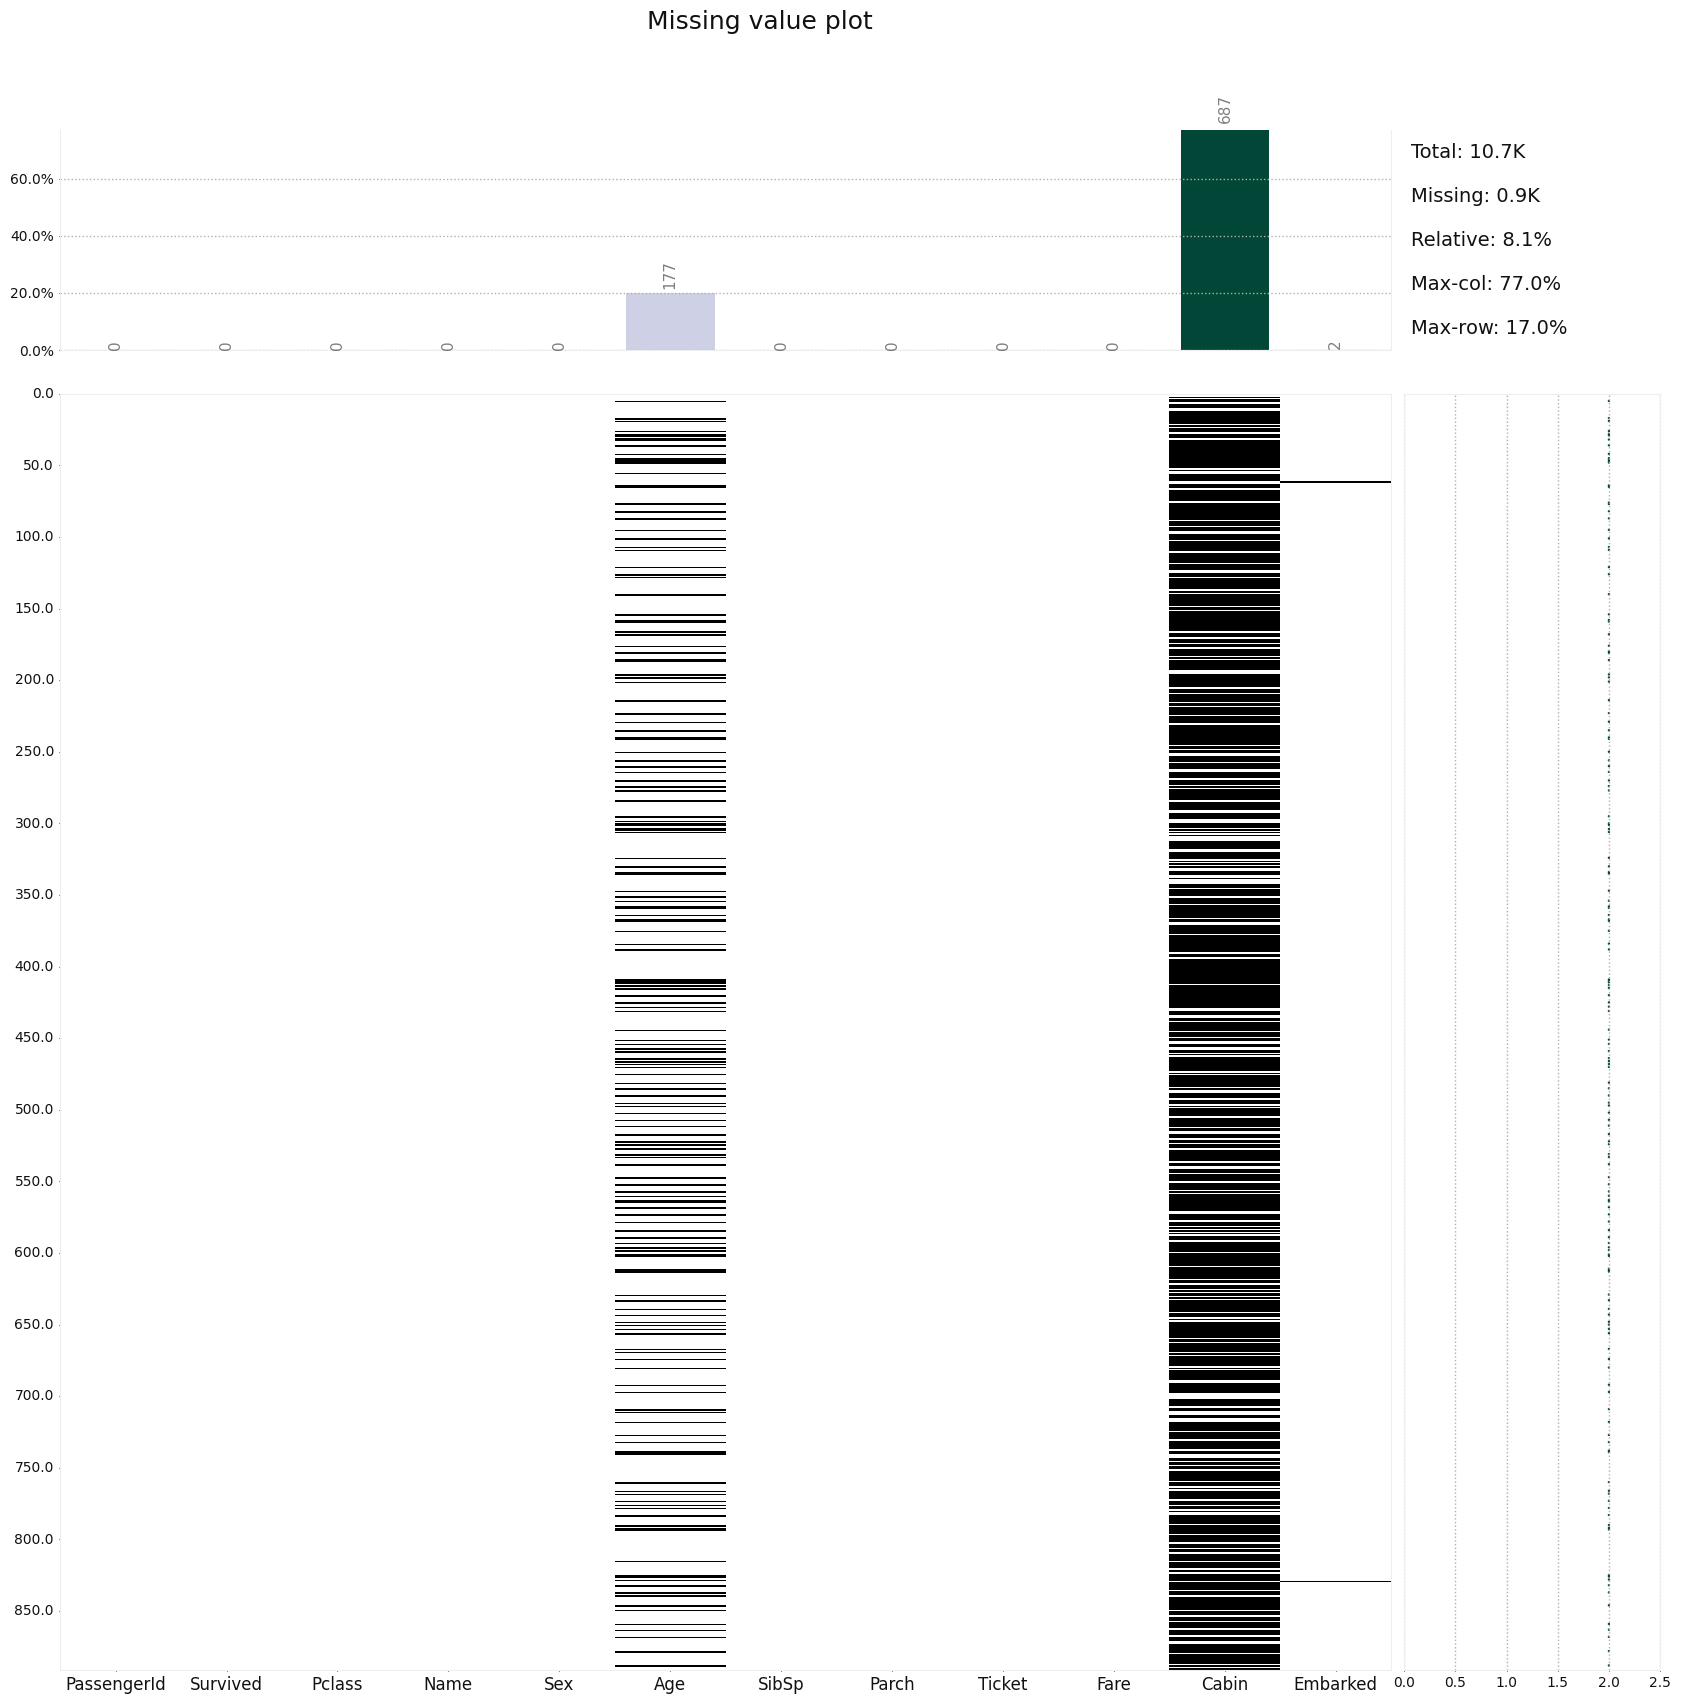

In [ ]:
# Missing Value Plot
klib.missingval_plot(df) # returns a figure containing information about missing values
